###Optimizing MLP Architectures for MNIST Classification

***Loading the dataset***

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


Loading MNIST dataset...

MNIST Dataset Information:
Training set:
  - Images (x_train): (60000, 28, 28)
  - Labels (y_train): (60000,)
  - Total training samples: 60000

Test set:
  - Images (x_test): (10000, 28, 28)
  - Labels (y_test): (10000,)
  - Total test samples: 10000

Dataset details:
  - Image dimensions: 28 x 28 pixels
  - Number of classes: 10
  - Classes: [np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)]
  - Data type: uint8
  - Pixel value range: 0 - 255

Sample Images from Training Set:


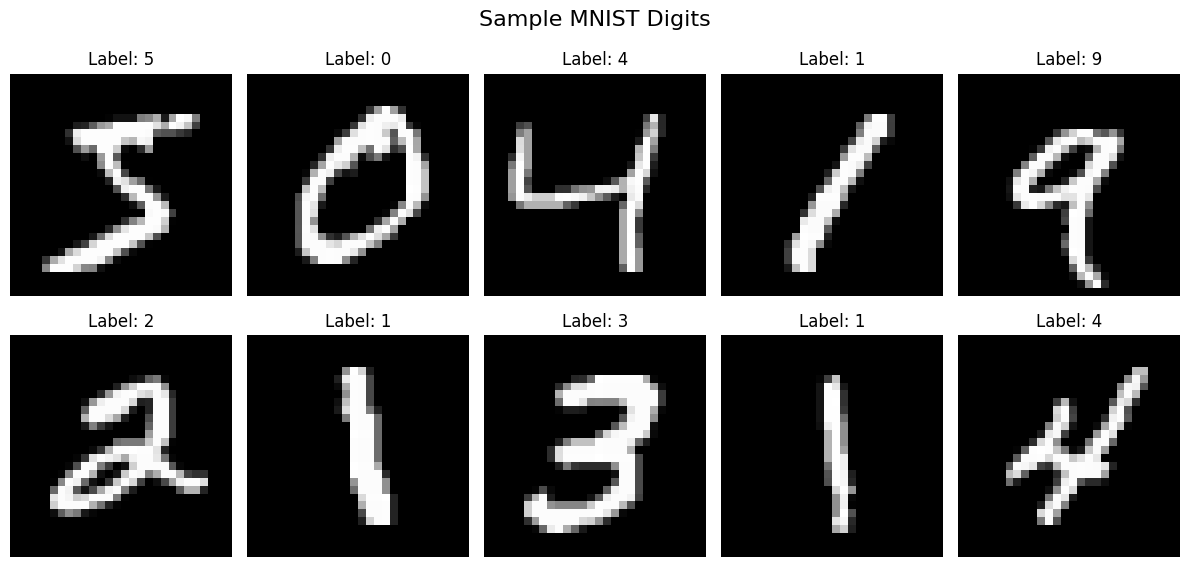


Class distribution in training set:
  Digit 0: 5923 samples
  Digit 1: 6742 samples
  Digit 2: 5958 samples
  Digit 3: 6131 samples
  Digit 4: 5842 samples
  Digit 5: 5421 samples
  Digit 6: 5918 samples
  Digit 7: 6265 samples
  Digit 8: 5851 samples
  Digit 9: 5949 samples


In [ ]:
# MNIST dataset loading
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Sizes of training and test sets
print("\n" + "="*50)
print("MNIST Dataset Information:")
print("="*50)

print(f"Training set:")
print(f"  - Images (x_train): {x_train.shape}")
print(f"  - Labels (y_train): {y_train.shape}")
print(f"  - Total training samples: {len(x_train)}")

print(f"\nTest set:")
print(f"  - Images (x_test): {x_test.shape}")
print(f"  - Labels (y_test): {y_test.shape}")
print(f"  - Total test samples: {len(x_test)}")

print(f"\nDataset details:")
print(f"  - Image dimensions: {x_train.shape[1]} x {x_train.shape[2]} pixels")
print(f"  - Number of classes: {len(np.unique(y_train))}")
print(f"  - Classes: {sorted(np.unique(y_train))}")
print(f"  - Data type: {x_train.dtype}")
print(f"  - Pixel value range: {x_train.min()} - {x_train.max()}")

print("\n" + "="*50)
print("Sample Images from Training Set:")
print("="*50)

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('Sample MNIST Digits', fontsize=16)

for i in range(10):
    row = i // 5
    col = i % 5
    axes[row, col].imshow(x_train[i], cmap='gray')
    axes[row, col].set_title(f'Label: {y_train[i]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print("\nClass distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} samples")

***Developing a 1 hidden layer multi-layer perceptron model***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


Preprocessing the data...
   - Training data shape after normalization: (60000, 28, 28)
   - Test data shape after normalization: (10000, 28, 28)
   - Training labels shape after one-hot encoding: (60000, 10)
   - Test labels shape after one-hot encoding: (10000, 10)
   - Pixel value range: 0.0 to 1.0

Building the MLP model...

Compiling the model...

Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


Training the model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8303 - loss: 0.6227 - val_accuracy: 0.9456 - val_loss: 0.1946
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9471 - loss: 0.1807 - val_accuracy: 0.9574 - val_loss: 0.1451
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9638 - loss: 0.1260 - val_accuracy: 0.9681 - val_loss: 0.1097
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9740 - loss: 0.0912 - val_accuracy: 0.9715 - val_loss: 0.0949
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9786 - loss: 0.0760 - val_accuracy: 0.9735 - val_loss: 0.0862
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9836 - loss: 0.0620 - val_accuracy: 0.9741 - val_loss: 0.0804
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0499 - val_accuracy: 0.9741 - val_loss: 0.0815
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9875 - loss: 0.

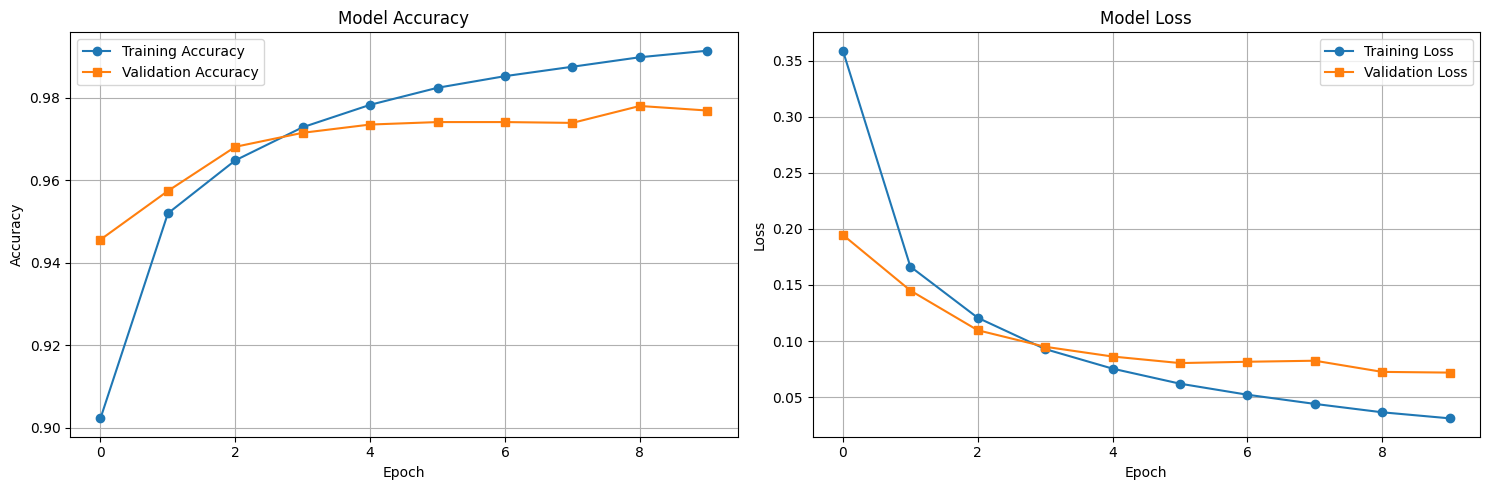


Testing predictions on sample images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step

Sample Predictions:
   Image 1: Predicted = 7, True = 7, Confidence = 99.4%
   Image 2: Predicted = 2, True = 2, Confidence = 100.0%
   Image 3: Predicted = 1, True = 1, Confidence = 99.9%
   Image 4: Predicted = 0, True = 0, Confidence = 100.0%
   Image 5: Predicted = 4, True = 4, Confidence = 98.9%
   Image 6: Predicted = 1, True = 1, Confidence = 99.9%
   Image 7: Predicted = 4, True = 4, Confidence = 99.8%
   Image 8: Predicted = 9, True = 9, Confidence = 99.9%
   Image 9: Predicted = 5, True = 5, Confidence = 69.2%
   Image 10: Predicted = 9, True = 9, Confidence = 99.9%


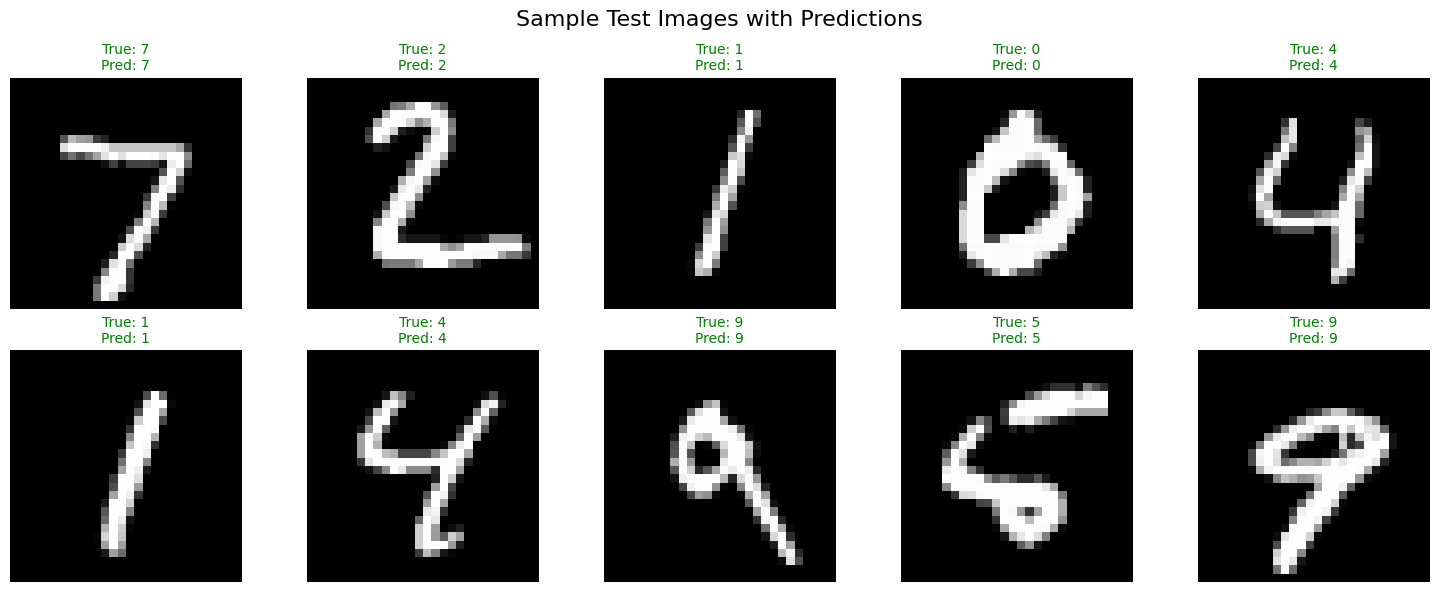


MODEL SUMMARY:
Architecture: Input(784) -> Hidden(128, ReLU) -> Output(10, Softmax)
Total Parameters: 101,770
Final Test Accuracy: 0.9769 (97.69%)
Training completed successfully!


In [ ]:
# Data Preprocessing
print("\nPreprocessing the data...")

# Normalizing pixel values to range [0, 1]
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# One-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"   - Training data shape after normalization: {x_train_normalized.shape}")
print(f"   - Test data shape after normalization: {x_test_normalized.shape}")
print(f"   - Training labels shape after one-hot encoding: {y_train_categorical.shape}")
print(f"   - Test labels shape after one-hot encoding: {y_test_categorical.shape}")
print(f"   - Pixel value range: {x_train_normalized.min()} to {x_train_normalized.max()}")

# Building the MLP Model
print("\nBuilding the MLP model...")

model = Sequential([
    # Flattenning the 28x28 images to 784-dimensional vectors
    Flatten(input_shape=(28, 28)),

    # Hidden layer
    Dense(128, activation='relu', name='hidden_layer'),

    # Output layer
    Dense(10, activation='softmax', name='output_layer')
])

# Model comlipation
print("\nCompiling the model...")
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Architecture:")
model.summary()

# Training the model
print("\nTraining the model...")

history = model.fit(
    x_train_normalized, y_train_categorical,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_normalized, y_test_categorical),
    verbose=1
)

# Evaluating the model
print("\nEvaluating the model...")

# Evaluate on training data
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_categorical, verbose=0)

# Evaluate on test data
test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_categorical, verbose=0)

print("\n" + "="*60)
print("FINAL RESULTS:")
print("="*60)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Training Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

print("\nPlotting training history...")

plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nTesting predictions on sample images...")

predictions = model.predict(x_test_normalized[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[:10]

print("\nSample Predictions:")
for i in range(10):
    confidence = predictions[i][predicted_classes[i]] * 100
    print(f"   Image {i+1}: Predicted = {predicted_classes[i]}, "
          f"True = {true_classes[i]}, "
          f"Confidence = {confidence:.1f}%")

# Display some test images with predictions
plt.figure(figsize=(15, 6))
plt.suptitle('Sample Test Images with Predictions', fontsize=16)

for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')

    color = 'green' if predicted_classes[i] == true_classes[i] else 'red'
    plt.title(f'True: {true_classes[i]}\nPred: {predicted_classes[i]}',
              color=color, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("MODEL SUMMARY:")
print(f"{'='*60}")
print(f"Architecture: Input(784) -> Hidden(128, ReLU) -> Output(10, Softmax)")
print(f"Total Parameters: {model.count_params():,}")
print(f"Final Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Training completed successfully!")

***Setting new number of hiden layers and new layer size***

In [ ]:
import time

Testing MLP models with [2, 4, 6, 8, 10] hidden layers
Each hidden layer has 100 neurons
Activation: ReLU for hidden layers, Softmax for output


Testing 2 Hidden Layers
Creating model with 2 hidden layers...
Model architecture:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8268 - loss: 0.6185 - val_accuracy: 0.9531 - val_loss: 0.1612
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9569 - loss: 0.1469 - val_accuracy: 0.9642 - val_loss: 0.1177
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9708 - loss: 0.1013 - val_accuracy: 0.9709 - val_loss: 0.0931
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9774 - loss: 0.0736 - val_accuracy: 0.9739 - val_loss: 0.0863
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9831 - loss: 0.0571 - val_accuracy: 0.9772 - val_loss: 0.0739
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9863 - loss: 0.0442 - val_accuracy: 0.9735 - val_loss: 0.0877
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9890 - loss: 0.0360 - val_accuracy: 0.9769 - val_loss: 0.0769
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9909 - loss: 0.0291 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,810 (428.95 KB)

 Trainable params: 109,810 (428.95 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8084 - loss: 0.6443 - val_accuracy: 0.9461 - val_loss: 0.1704
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9604 - loss: 0.1326 - val_accuracy: 0.9633 - val_loss: 0.1186
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9728 - loss: 0.0900 - val_accuracy: 0.9709 - val_loss: 0.0966
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9790 - loss: 0.0664 - val_accuracy: 0.9718 - val_loss: 0.0883
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9857 - loss: 0.0475 - val_accuracy: 0.9685 - val_loss: 0.1046
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9878 - loss: 0.0404 - val_accuracy: 0.9740 - val_loss: 0.0878
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9894 - loss: 0.0328 - val_accuracy: 0.9752 - val_loss: 0.0884
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9907 - loss: 0.0292 

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,010 (507.85 KB)

 Trainable params: 130,010 (507.85 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7763 - loss: 0.6893 - val_accuracy: 0.9592 - val_loss: 0.1397
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9595 - loss: 0.1359 - val_accuracy: 0.9614 - val_loss: 0.1224
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.0979 - val_accuracy: 0.9682 - val_loss: 0.1073
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9779 - loss: 0.0691 - val_accuracy: 0.9737 - val_loss: 0.0901
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0588 - val_accuracy: 0.9727 - val_loss: 0.0959
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9852 - loss: 0.0477 - val_accuracy: 0.9739 - val_loss: 0.0948
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9881 - loss: 0.0385 - val_accuracy: 0.9739 - val_loss: 0.1017
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9880 - loss: 0.0362 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_7 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_8 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 150,210 (586.76 KB)

 Trainable params: 150,210 (586.76 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7677 - loss: 0.6906 - val_accuracy: 0.9432 - val_loss: 0.1868
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9585 - loss: 0.1429 - val_accuracy: 0.9585 - val_loss: 0.1360
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9714 - loss: 0.0991 - val_accuracy: 0.9673 - val_loss: 0.1053
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9758 - loss: 0.0802 - val_accuracy: 0.9717 - val_loss: 0.1009
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9792 - loss: 0.0672 - val_accuracy: 0.9676 - val_loss: 0.1111
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9823 - loss: 0.0587 - val_accuracy: 0.9717 - val_loss: 0.0975
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9850 - loss: 0.0479 - val_accuracy: 0.9738 - val_loss: 0.1039
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9863 - loss: 0.0433 

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_4 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_5 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_6 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_7 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_8 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_9 (Dense)          │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_10 (Dense)         │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,410 (665.66 KB)

 Trainable params: 170,410 (665.66 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7151 - loss: 0.8156 - val_accuracy: 0.9466 - val_loss: 0.1797
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9575 - loss: 0.1462 - val_accuracy: 0.9626 - val_loss: 0.1304
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9685 - loss: 0.1076 - val_accuracy: 0.9634 - val_loss: 0.1249
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9760 - loss: 0.0841 - val_accuracy: 0.9703 - val_loss: 0.1075
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9783 - loss: 0.0723 - val_accuracy: 0.9680 - val_loss: 0.1135
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9826 - loss: 0.0570 - val_accuracy: 0.9705 - val_loss: 0.1107
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9846 - loss: 0.0535 - val_accuracy: 0.9716 - val_loss: 0.1044
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9855 - loss: 0.0507 

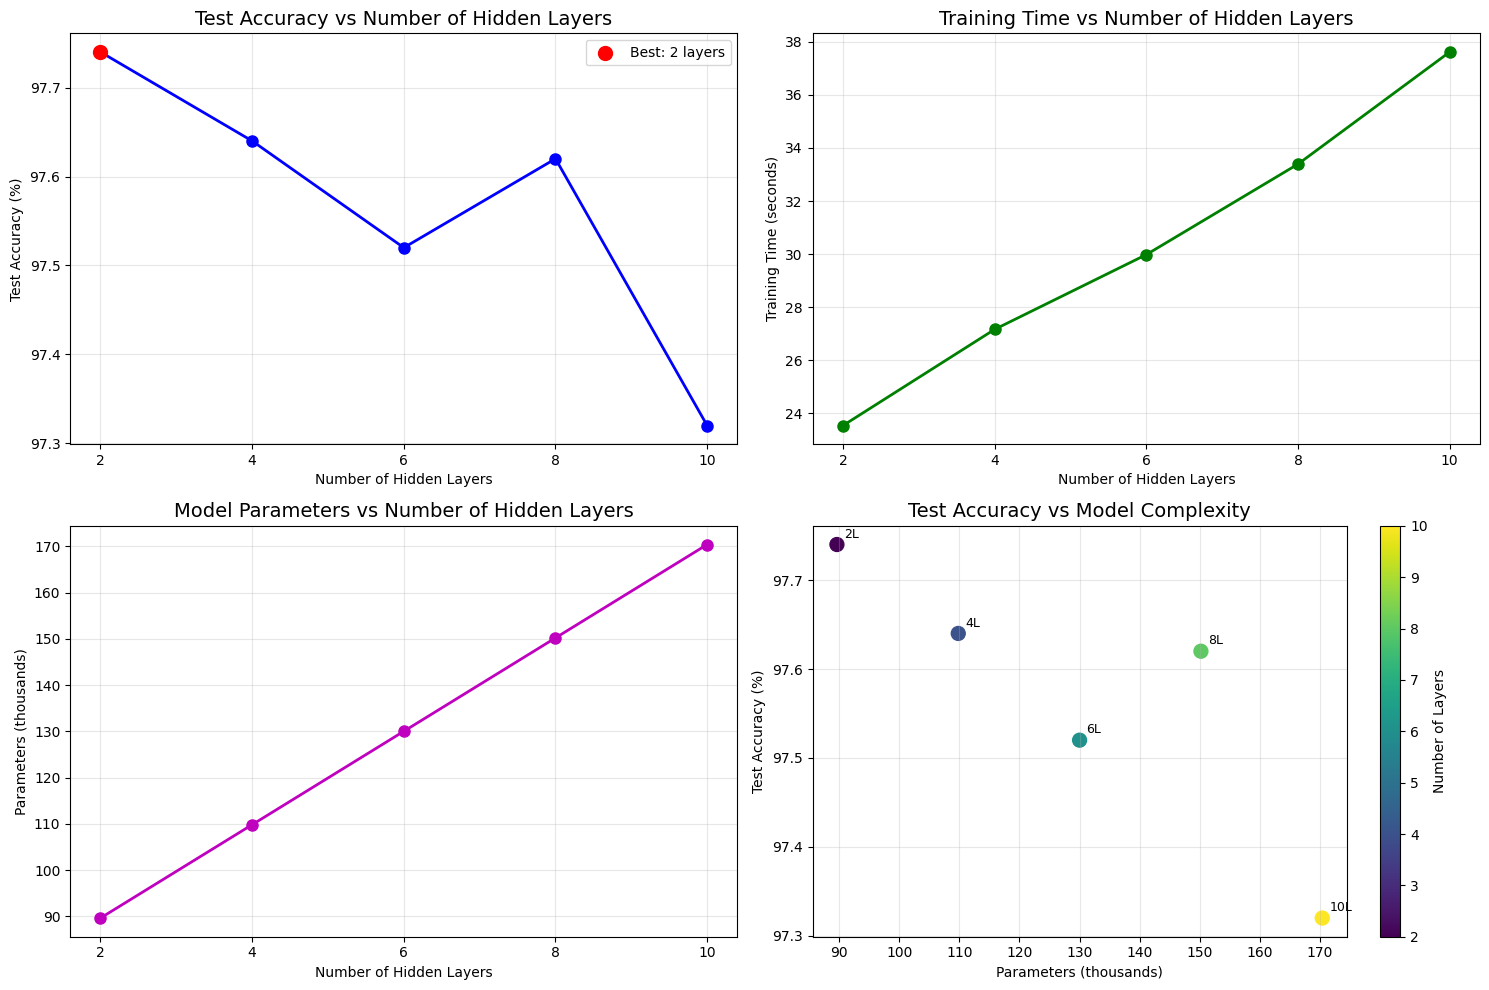


ANALYSIS AND INSIGHTS
Performance Analysis:
   - Highest accuracy: 0.9774 (97.74%)
   - Lowest accuracy: 0.9732 (97.32%)
   - Accuracy range: 0.0042 (0.42%)

Training Time Analysis:
   - Fastest training: 23.54 seconds
   - Slowest training: 37.61 seconds

Model Complexity:
   - Smallest model: 89,610 parameters
   - Largest model: 170,410 parameters

Trend Analysis:
   - Overall accuracy trend: decreasing
   - Diminishing returns observed: True

Key Observations:
   - Best performing model: 2 hidden layers
   - Trade-off between complexity and performance observed
   - Training time scales approximately linearly with depth


In [ ]:
hidden_layer_counts = [2, 4, 6, 8, 10]
hidden_layer_size = 100

results = {
    'layers': [],
    'test_accuracy': [],
    'training_time': [],
    'total_params': [],
    'models': []
}

print(f"Testing MLP models with {hidden_layer_counts} hidden layers")
print(f"Each hidden layer has {hidden_layer_size} neurons")
print(f"Activation: ReLU for hidden layers, Softmax for output")
print("\n" + "="*70)

# Function to create MLP model with specified number of hidden layers
def create_mlp_model(num_hidden_layers, hidden_size=100):
    """
    Create MLP model with specified number of hidden layers
    """
    model = Sequential()

    # Input layer (flatten)
    model.add(Flatten(input_shape=(28, 28)))

    # Add hidden layers
    for i in range(num_hidden_layers):
        model.add(Dense(hidden_size, activation='relu',
                       name=f'hidden_layer_{i+1}'))

    # Output layer
    model.add(Dense(10, activation='softmax', name='output_layer'))

    return model

# Testing each configuration
for num_layers in hidden_layer_counts:
    print(f"\n{'='*50}")
    print(f"Testing {num_layers} Hidden Layers")
    print(f"{'='*50}")

    # Creating model
    print(f"Creating model with {num_layers} hidden layers...")
    model = create_mlp_model(num_layers, hidden_layer_size)

    # Compiling
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )


    print(f"Model architecture:")
    model.summary()
    total_params = model.count_params()

    print(f"Training model...")
    start_time = time.time()

    history = model.fit(
        x_train_normalized, y_train_categorical,
        epochs=10,
        batch_size=128,
        validation_data=(x_test_normalized, y_test_categorical),
        verbose=1
    )

    training_time = time.time() - start_time

    # Evaluating model
    print(f"Evaluating model...")
    test_loss, test_accuracy = model.evaluate(
        x_test_normalized, y_test_categorical, verbose=0
    )

    # Results
    results['layers'].append(num_layers)
    results['test_accuracy'].append(test_accuracy)
    results['training_time'].append(training_time)
    results['total_params'].append(total_params)
    results['models'].append(model)

    print(f"\nResults for {num_layers} hidden layers:")
    print(f"   - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   - Training Time: {training_time:.2f} seconds")
    print(f"   - Total Parameters: {total_params:,}")

print(f"\n{'='*70}")
print("COMPREHENSIVE RESULTS COMPARISON")
print(f"{'='*70}")

print(f"{'Layers':<8} {'Test Acc':<10} {'Acc %':<8} {'Time (s)':<10} {'Parameters':<12}")
print(f"{'-'*8} {'-'*10} {'-'*8} {'-'*10} {'-'*12}")

for i, layers in enumerate(results['layers']):
    acc = results['test_accuracy'][i]
    time_taken = results['training_time'][i]
    params = results['total_params'][i]

    print(f"{layers:<8} {acc:<10.4f} {acc*100:<8.2f} {time_taken:<10.2f} {params:<12,}")

# Finding best model
best_idx = np.argmax(results['test_accuracy'])
best_layers = results['layers'][best_idx]
best_accuracy = results['test_accuracy'][best_idx]

print(f"\nBEST MODEL:")
print(f"   - Number of layers: {best_layers}")
print(f"   - Test accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Visualization
plt.figure(figsize=(15, 10))

# Testing Accuracy vs Number of Layers
plt.subplot(2, 2, 1)
plt.plot(results['layers'], [acc*100 for acc in results['test_accuracy']],
         'bo-', linewidth=2, markersize=8)
plt.title('Test Accuracy vs Number of Hidden Layers', fontsize=14)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Test Accuracy (%)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layers'])

# Highlighting best model
plt.scatter([best_layers], [best_accuracy*100], color='red', s=100,
           label=f'Best: {best_layers} layers', zorder=5)
plt.legend()

# Training Time vs Number of Layers
plt.subplot(2, 2, 2)
plt.plot(results['layers'], results['training_time'],
         'go-', linewidth=2, markersize=8)
plt.title('Training Time vs Number of Hidden Layers', fontsize=14)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Training Time (seconds)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layers'])

# Number of Parameters vs Number of Layers
plt.subplot(2, 2, 3)
plt.plot(results['layers'], [p/1000 for p in results['total_params']],
         'mo-', linewidth=2, markersize=8)
plt.title('Model Parameters vs Number of Hidden Layers', fontsize=14)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Parameters (thousands)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layers'])

# Accuracy vs Parameters (efficiency plot)
plt.subplot(2, 2, 4)
plt.scatter([p/1000 for p in results['total_params']],
           [acc*100 for acc in results['test_accuracy']],
           c=results['layers'], s=100, cmap='viridis')
plt.colorbar(label='Number of Layers')
plt.title('Test Accuracy vs Model Complexity', fontsize=14)
plt.xlabel('Parameters (thousands)')
plt.ylabel('Test Accuracy (%)')
plt.grid(True, alpha=0.3)

# Add annotations for each point
for i, layers in enumerate(results['layers']):
    plt.annotate(f'{layers}L',
                (results['total_params'][i]/1000, results['test_accuracy'][i]*100),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

# Analysis and insights
print(f"\n{'='*70}")
print("ANALYSIS AND INSIGHTS")
print(f"{'='*70}")

# Calculate accuracy differences
max_acc = max(results['test_accuracy'])
min_acc = min(results['test_accuracy'])
acc_range = max_acc - min_acc

print(f"Performance Analysis:")
print(f"   - Highest accuracy: {max_acc:.4f} ({max_acc*100:.2f}%)")
print(f"   - Lowest accuracy: {min_acc:.4f} ({min_acc*100:.2f}%)")
print(f"   - Accuracy range: {acc_range:.4f} ({acc_range*100:.2f}%)")

print(f"\nTraining Time Analysis:")
print(f"   - Fastest training: {min(results['training_time']):.2f} seconds")
print(f"   - Slowest training: {max(results['training_time']):.2f} seconds")

print(f"\nModel Complexity:")
print(f"   - Smallest model: {min(results['total_params']):,} parameters")
print(f"   - Largest model: {max(results['total_params']):,} parameters")

# Determine if there's a clear trend
if results['test_accuracy'][0] < results['test_accuracy'][-1]:
    trend = "increasing"
elif results['test_accuracy'][0] > results['test_accuracy'][-1]:
    trend = "decreasing"
else:
    trend = "mixed"

print(f"\nTrend Analysis:")
print(f"   - Overall accuracy trend: {trend}")
print(f"   - Diminishing returns observed: {acc_range < 0.02}")

print(f"\nKey Observations:")
print(f"   - Best performing model: {best_layers} hidden layers")
print(f"   - Trade-off between complexity and performance observed")
print(f"   - Training time scales approximately linearly with depth")

***Trying other hiden layer sizes***

Testing MLP models with hidden layer sizes: [50, 100, 150, 200]
Architecture: Input(784) -> Hidden(size) -> Output(10)
Activation: ReLU for hidden layer, Softmax for output


Testing Hidden Layer Size: 50
Creating model with 50 neurons in hidden layer...
Model architecture:


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_50 (Dense)         │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,760 (155.31 KB)

 Trainable params: 39,760 (155.31 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7811 - loss: 0.7924 - val_accuracy: 0.9296 - val_loss: 0.2471
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9347 - loss: 0.2318 - val_accuracy: 0.9448 - val_loss: 0.1858
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9490 - loss: 0.1828 - val_accuracy: 0.9522 - val_loss: 0.1599
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1478 - val_accuracy: 0.9572 - val_loss: 0.1457
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9653 - loss: 0.1240 - val_accuracy: 0.9602 - val_loss: 0.1247
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9695 - loss: 0.1076 - val_accuracy: 0.9638 - val_loss: 0.1174
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9709 - loss: 0.0988 - val_accuracy: 0.9653 - val_loss: 0.1134
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9737 - loss: 0.0878 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_12 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_100 (Dense)        │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8244 - loss: 0.6445 - val_accuracy: 0.9417 - val_loss: 0.2072
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9450 - loss: 0.1953 - val_accuracy: 0.9568 - val_loss: 0.1491
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9624 - loss: 0.1366 - val_accuracy: 0.9654 - val_loss: 0.1209
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9699 - loss: 0.1063 - val_accuracy: 0.9682 - val_loss: 0.1078
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9765 - loss: 0.0839 - val_accuracy: 0.9727 - val_loss: 0.0937
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9811 - loss: 0.0653 - val_accuracy: 0.9740 - val_loss: 0.0923
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9851 - loss: 0.0548 - val_accuracy: 0.9750 - val_loss: 0.0842
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9870 - loss: 0.0475 

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_150 (Dense)        │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,260 (465.86 KB)

 Trainable params: 119,260 (465.86 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8325 - loss: 0.6012 - val_accuracy: 0.9450 - val_loss: 0.1846
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9528 - loss: 0.1675 - val_accuracy: 0.9619 - val_loss: 0.1264
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9682 - loss: 0.1152 - val_accuracy: 0.9698 - val_loss: 0.1026
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9749 - loss: 0.0879 - val_accuracy: 0.9726 - val_loss: 0.0916
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9801 - loss: 0.0691 - val_accuracy: 0.9739 - val_loss: 0.0820
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9836 - loss: 0.0548 - val_accuracy: 0.9747 - val_loss: 0.0839
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9870 - loss: 0.0454 - val_accuracy: 0.9762 - val_loss: 0.0739
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0384 

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_14 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_200 (Dense)        │ (None, 200)            │       157,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,010 (621.13 KB)

 Trainable params: 159,010 (621.13 KB)

 Non-trainable params: 0 (0.00 B)

Training model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8436 - loss: 0.5718 - val_accuracy: 0.9503 - val_loss: 0.1681
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9565 - loss: 0.1563 - val_accuracy: 0.9645 - val_loss: 0.1181
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.1028 - val_accuracy: 0.9708 - val_loss: 0.0997
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0759 - val_accuracy: 0.9754 - val_loss: 0.0834
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9837 - loss: 0.0580 - val_accuracy: 0.9756 - val_loss: 0.0809
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9868 - loss: 0.0468 - val_accuracy: 0.9766 - val_loss: 0.0753
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9896 - loss: 0.0382 - val_accuracy: 0.9782 - val_loss: 0.0734
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9923 - loss: 0.0291 

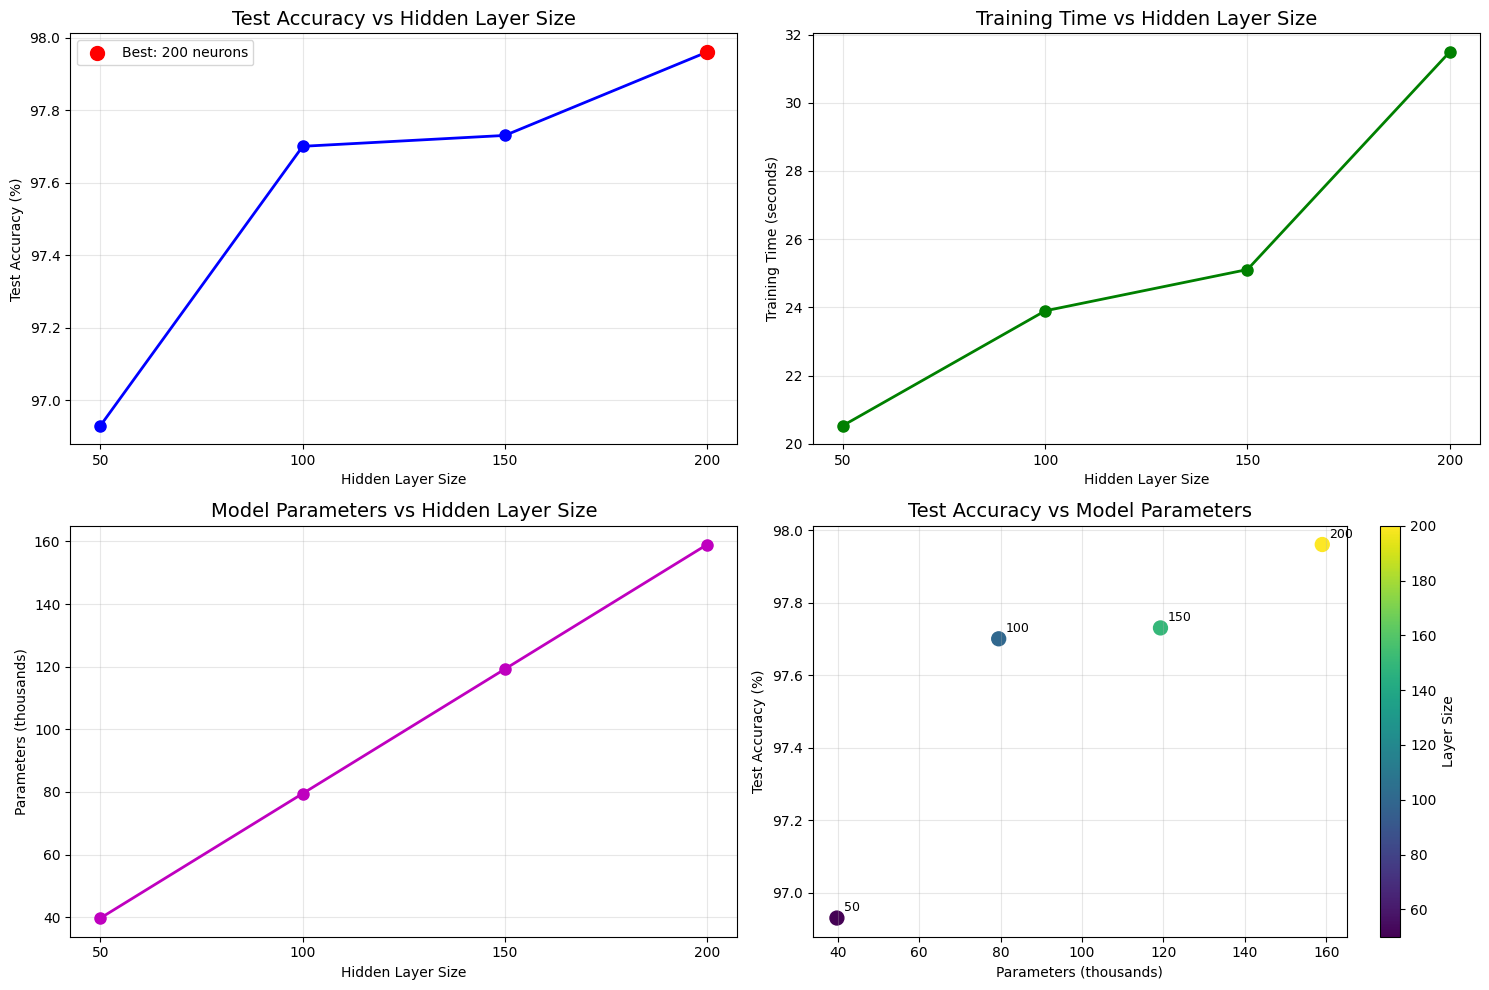


ANALYSIS AND INSIGHTS
Performance Analysis:
   - Highest accuracy: 0.9796 (97.96%)
   - Lowest accuracy: 0.9693 (96.93%)
   - Accuracy range: 0.0103 (1.03%)

Training Time Analysis:
   - Fastest training: 20.54 seconds
   - Slowest training: 31.49 seconds
   - Time increase ratio: 1.53x

Model Complexity:
   - Smallest model: 39,760 parameters
   - Largest model: 159,010 parameters
   - Parameter increase ratio: 4.00x

Trend Analysis:
   - Overall accuracy trend: increasing
   - Performance plateau observed: False

Efficiency Analysis:
   - Most efficient model: 50 neurons
   - Efficiency = accuracy/parameters
      Size 50: 24.38 (accuracy per million parameters)
      Size 100: 12.29 (accuracy per million parameters)
      Size 150: 8.19 (accuracy per million parameters)
      Size 200: 6.16 (accuracy per million parameters)

Key Observations:
   - Best performing model: 200 neurons
   - Most efficient model: 50 neurons
   - Diminishing returns threshold: likely around 100-150 neuro

In [ ]:
hidden_layer_sizes = [50, 100, 150, 200]

results = {
    'layer_size': [],
    'test_accuracy': [],
    'training_time': [],
    'total_params': [],
    'models': []
}

print(f"Testing MLP models with hidden layer sizes: {hidden_layer_sizes}")
print(f"Architecture: Input(784) -> Hidden(size) -> Output(10)")
print(f"Activation: ReLU for hidden layer, Softmax for output")
print("\n" + "="*70)

# Function to create MLP model
def create_mlp_model(hidden_size):
    """
    Create MLP model with one hidden layer of specified size
    """
    model = Sequential([
        Flatten(input_shape=(28, 28)),

        Dense(hidden_size, activation='relu', name=f'hidden_layer_{hidden_size}'),

        Dense(10, activation='softmax', name='output_layer')
    ])

    return model

# Testing each hidden layer size
for size in hidden_layer_sizes:
    print(f"\n{'='*50}")
    print(f"Testing Hidden Layer Size: {size}")
    print(f"{'='*50}")

    print(f"Creating model with {size} neurons in hidden layer...")
    model = create_mlp_model(size)

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(f"Model architecture:")
    model.summary()
    total_params = model.count_params()

    print(f"Training model...")
    start_time = time.time()

    history = model.fit(
        x_train_normalized, y_train_categorical,
        epochs=10,
        batch_size=128,
        validation_data=(x_test_normalized, y_test_categorical),
        verbose=1
    )

    training_time = time.time() - start_time

    print(f"Evaluating model...")
    test_loss, test_accuracy = model.evaluate(
        x_test_normalized, y_test_categorical, verbose=0
    )

    results['layer_size'].append(size)
    results['test_accuracy'].append(test_accuracy)
    results['training_time'].append(training_time)
    results['total_params'].append(total_params)
    results['models'].append(model)

    print(f"\nResults for hidden layer size {size}:")
    print(f"   - Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"   - Training Time: {training_time:.2f} seconds")
    print(f"   - Total Parameters: {total_params:,}")

print(f"\n{'='*70}")
print("COMPREHENSIVE RESULTS COMPARISON")
print(f"{'='*70}")

print(f"{'Size':<6} {'Test Acc':<10} {'Acc %':<8} {'Time (s)':<10} {'Parameters':<12}")
print(f"{'-'*6} {'-'*10} {'-'*8} {'-'*10} {'-'*12}")

for i, size in enumerate(results['layer_size']):
    acc = results['test_accuracy'][i]
    time_taken = results['training_time'][i]
    params = results['total_params'][i]

    print(f"{size:<6} {acc:<10.4f} {acc*100:<8.2f} {time_taken:<10.2f} {params:<12,}")

# Finding best model
best_idx = np.argmax(results['test_accuracy'])
best_size = results['layer_size'][best_idx]
best_accuracy = results['test_accuracy'][best_idx]

print(f"\nBEST MODEL:")
print(f"   - Hidden layer size: {best_size}")
print(f"   - Test accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")

# Calculate parameter breakdown
print(f"\nPARAMETER BREAKDOWN:")
for i, size in enumerate(results['layer_size']):
    input_to_hidden = 784 * size + size  # weights + biases
    hidden_to_output = size * 10 + 10    # weights + biases
    total_calculated = input_to_hidden + hidden_to_output

    print(f"   Size {size}: Input->Hidden({input_to_hidden:,}) + Hidden->Output({hidden_to_output:,}) = {total_calculated:,}")

# Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Test Accuracy vs Hidden Layer Size
plt.subplot(2, 2, 1)
plt.plot(results['layer_size'], [acc*100 for acc in results['test_accuracy']],
         'bo-', linewidth=2, markersize=8)
plt.title('Test Accuracy vs Hidden Layer Size', fontsize=14)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Test Accuracy (%)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layer_size'])

# Highlight best model
plt.scatter([best_size], [best_accuracy*100], color='red', s=100,
           label=f'Best: {best_size} neurons', zorder=5)
plt.legend()

# Plot 2: Training Time vs Hidden Layer Size
plt.subplot(2, 2, 2)
plt.plot(results['layer_size'], results['training_time'],
         'go-', linewidth=2, markersize=8)
plt.title('Training Time vs Hidden Layer Size', fontsize=14)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Training Time (seconds)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layer_size'])

# Plot 3: Number of Parameters vs Hidden Layer Size
plt.subplot(2, 2, 3)
plt.plot(results['layer_size'], [p/1000 for p in results['total_params']],
         'mo-', linewidth=2, markersize=8)
plt.title('Model Parameters vs Hidden Layer Size', fontsize=14)
plt.xlabel('Hidden Layer Size')
plt.ylabel('Parameters (thousands)')
plt.grid(True, alpha=0.3)
plt.xticks(results['layer_size'])

# Plot 4: Accuracy vs Parameters
plt.subplot(2, 2, 4)
plt.scatter([p/1000 for p in results['total_params']],
           [acc*100 for acc in results['test_accuracy']],
           c=results['layer_size'], s=100, cmap='viridis')
plt.colorbar(label='Layer Size')
plt.title('Test Accuracy vs Model Parameters', fontsize=14)
plt.xlabel('Parameters (thousands)')
plt.ylabel('Test Accuracy (%)')
plt.grid(True, alpha=0.3)

for i, size in enumerate(results['layer_size']):
    plt.annotate(f'{size}',
                (results['total_params'][i]/1000, results['test_accuracy'][i]*100),
                xytext=(5, 5), textcoords='offset points', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("ANALYSIS AND INSIGHTS")
print(f"{'='*70}")

max_acc = max(results['test_accuracy'])
min_acc = min(results['test_accuracy'])
acc_range = max_acc - min_acc

print(f"Performance Analysis:")
print(f"   - Highest accuracy: {max_acc:.4f} ({max_acc*100:.2f}%)")
print(f"   - Lowest accuracy: {min_acc:.4f} ({min_acc*100:.2f}%)")
print(f"   - Accuracy range: {acc_range:.4f} ({acc_range*100:.2f}%)")

print(f"\nTraining Time Analysis:")
print(f"   - Fastest training: {min(results['training_time']):.2f} seconds")
print(f"   - Slowest training: {max(results['training_time']):.2f} seconds")
print(f"   - Time increase ratio: {max(results['training_time'])/min(results['training_time']):.2f}x")

print(f"\nModel Complexity:")
print(f"   - Smallest model: {min(results['total_params']):,} parameters")
print(f"   - Largest model: {max(results['total_params']):,} parameters")
print(f"   - Parameter increase ratio: {max(results['total_params'])/min(results['total_params']):.2f}x")

if results['test_accuracy'][-1] > results['test_accuracy'][0]:
    trend = "increasing"
elif results['test_accuracy'][-1] < results['test_accuracy'][0]:
    trend = "decreasing"
else:
    trend = "mixed/stable"

print(f"\nTrend Analysis:")
print(f"   - Overall accuracy trend: {trend}")
print(f"   - Performance plateau observed: {acc_range < 0.01}")

# Calculating efficiency
efficiency = [acc/params for acc, params in zip(results['test_accuracy'], results['total_params'])]
most_efficient_idx = np.argmax(efficiency)
most_efficient_size = results['layer_size'][most_efficient_idx]

print(f"\nEfficiency Analysis:")
print(f"   - Most efficient model: {most_efficient_size} neurons")
print(f"   - Efficiency = accuracy/parameters")
for i, size in enumerate(results['layer_size']):
    eff = efficiency[i] * 1000000
    print(f"      Size {size}: {eff:.2f} (accuracy per million parameters)")

print(f"\nKey Observations:")
print(f"   - Best performing model: {best_size} neurons")
print(f"   - Most efficient model: {most_efficient_size} neurons")
print(f"   - Diminishing returns threshold: likely around {results['layer_size'][1]}-{results['layer_size'][2]} neurons")
print(f"   - Parameter growth is quadratic with layer size for input layer")

# Comparing with Question 2 result
q2_size = 128
estimated_q2_params = 784 * q2_size + q2_size + q2_size * 10 + 10
print(f"\nComparison with Question 2 (128 neurons):")
print(f"   - Estimated parameters: {estimated_q2_params:,}")
print(f"   - Previous accuracy: 97.69%")
print(f"   - Size 100 accuracy: {results['test_accuracy'][1]*100:.2f}%")
print(f"   - Size 150 accuracy: {results['test_accuracy'][2]*100:.2f}%")

***Neural Network Architecture Analysis: Depth vs Width Effects on MNIST Classification***

***Executive Summary***
This study examines the effects of width (number of neurons in a layer) and depth (number of hidden layers) on neural network performance using the MNIST digit dataset.

***Key Takeaways:***
- Question 3 (Depth): Training became slower and less accurate as the number of layers increased.
- Question 4 (Width): Accuracy increased with the number of neurons added, but advances halted at larger sizes.
- A single wide layer outperformed deeper but narrower networks.
- With 200 neurons, one hidden layer produced the greatest results, with an accuracy of about 98%.

***Methodology***

We used a basic neural network with:
- 784 input neurons (28x28 pictures that have been flattened)
- Layers hidden by ReLU activation
- 10 output neurons (digits 0–9, softmax)
- Batch size 128; 10 training rounds; Adam optimizer

Two experiments were run:
- Question 3 (Depth): Each of the two to ten buried layers, each with 100 neurons, was different.
- Question 4 (Width): There was only one buried layer, and there were between fifty and two hundred neurons.

Efficiency, accuracy, and training time were used to gauge performance.

***Results and Analysis***

***Question 3 – Depth Findings***

Accuracy decreased little as depth climbed.  The accuracy of the two-layer network was the highest, at roughly 97.7%.  Accuracy decreased and training time increased when more layers were added.  This demonstrates that deepening the network did not improve training; rather, it led to difficulties and decreased efficacy.

***Question 4 – Width Findings***

Accuracy improves with increasing width.  Accuracy increased nearly 97.7% as the number of neurons increased from 50 to 100.  Results were improved by increasing the number of neurons to 150 and 200. The network with 200 neurons achieved the highest accuracy of around 98%.  Although training time increased, it did so more slowly than the accuracy gains.

***Comparative Analysis***

Comparing both experiments:
- Lower performance and slower training were the results of depth scaling (Question 3).
- Width scaling (Question 4) improved parameter efficiency and yielded consistent gains.
- It was evident that a single large hidden layer performed better than deeper networks with numerous smaller layers.

***Why Width Outperformed Depth?***

The images of MNIST digits are quite basic.  The main patterns may be captured with a broad layer, while deeper layers needlessly complicate things.  Performance is further harmed by training difficulties for deep models, such as vanishing gradients and more intricate optimization.

***Recommendations***

For MNIST-like tasks:
- Use the strategy from Question 4—increase breadth rather than depth.
- To get the optimal balance between accuracy and efficiency, use a single hidden layer with 100–200 neurons combined.
- Even with limited resources, 50 neurons can still produce reasonable accuracy at a low cost.

***Limitations and Future Work***

These conclusions are primarily applicable to the straightforward dataset MNIST.  Deeper architectures might perform better for texts or images that are more complex, like natural imagery.  Future research ought to investigate convolutional networks, additional datasets, and more recent models such as Transformers.

***Conclusion***

The experiments clearly show that:
- Question 3 (Depth): Adding more layers slowed training and negatively impacted performance.
- Question 4 (Width): The best performance was achieved at 200 neurons, with wider layers improving performance.
- For the optimal balance between accuracy and efficiency, single hidden-layer networks of 100–200 neurons are recommended.

This demonstrates that network architecture should correspond with task difficulty and that greater depth is not always preferable.

***2 layer fully connected neural network***

In [ ]:
from tensorflow.keras.regularizers import l2

Using subset of 4000 training samples for double descent experiment
Test set remains: 10000 samples

Testing hidden layer sizes: [10, 20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]
Expected interpolation threshold around: 4000 parameters
(when model can perfectly memorize training data)

Theoretical interpolation threshold (approx): 5 hidden units
Corresponding to ~3,970 parameters

Experiment 1/11: Hidden Size = 10
Total parameters: 7,960
Training...
Results:
  - Training accuracy: 0.9413 (94.13%)
  - Test accuracy: 0.9003 (90.03%)
  - Training loss: 0.2217
  - Test loss: 0.3461
  - Training time: 13.03 seconds
  - Interpolation achieved: False

Experiment 2/11: Hidden Size = 20
Total parameters: 15,910
Training...
Results:
  - Training accuracy: 0.9718 (97.18%)
  - Test accuracy: 0.9142 (91.42%)
  - Training loss: 0.1341
  - Test loss: 0.3049
  - Training time: 12.94 seconds
  - Interpolation achieved: False

Experiment 3/11: Hidden Size = 50
Total parameters: 39,760
Training..

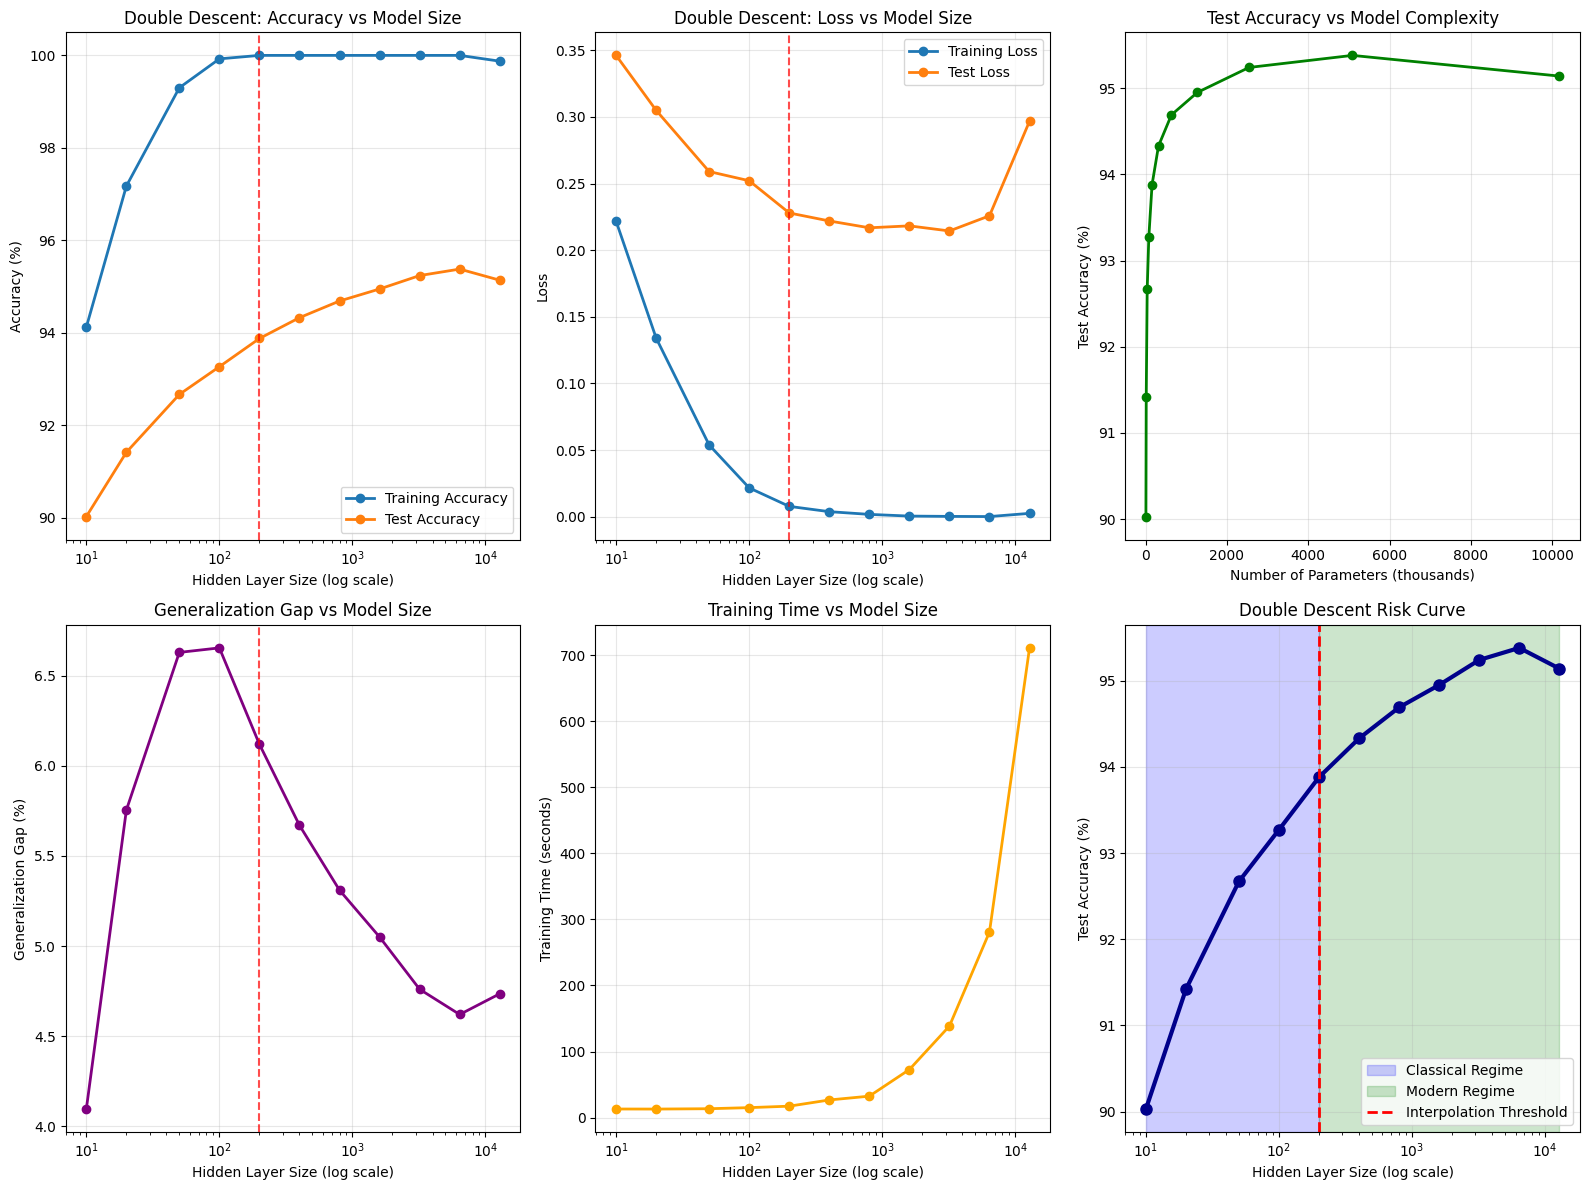


DOUBLE DESCENT ANALYSIS
Classical regime trend: increasing
Second descent observed: True
Performance improvement in modern regime: +0.81%

COMPARISON WITH RESEARCH PAPER:
  - Paper prediction: U-shaped curve followed by second descent
  - Our observation: [Analysis based on results above]
  - Interpolation behavior: Models with 4000 training samples
  - Dataset size effect: Smaller datasets show clearer double descent

PRACTICAL IMPLICATIONS:
  - Optimal model size for test accuracy: 6400 hidden units
  - Performance at interpolation vs. best: [Compare interpolation vs. best performance]
  - Training efficiency considerations: Larger models take longer to train
  - Modern ML practice validation: Very large models can outperform 'optimal' classical sizes

DOUBLE DESCENT EXPERIMENT COMPLETED


In [ ]:
n_samples = 4000
subset_indices = np.random.choice(len(x_train_normalized), n_samples, replace=False)

x_train_subset = x_train_normalized[subset_indices]
y_train_subset = y_train_categorical[subset_indices]

print(f"Using subset of {n_samples} training samples for double descent experiment")
print(f"Test set remains: {len(x_test_normalized)} samples")

hidden_sizes = [10, 20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800]

results = {
    'hidden_size': [],
    'num_parameters': [],
    'train_accuracy': [],
    'test_accuracy': [],
    'train_loss': [],
    'test_loss': [],
    'training_time': [],
    'interpolation_achieved': []
}

print(f"\nTesting hidden layer sizes: {hidden_sizes}")
print(f"Expected interpolation threshold around: {n_samples} parameters")
print(f"(when model can perfectly memorize training data)")
print("\n" + "="*80)

def create_two_layer_network(hidden_size, input_shape=(28, 28), num_classes=10):
    """Create a two-layer fully connected network"""
    model = Sequential([
        Flatten(input_shape=input_shape),
        Dense(hidden_size, activation='relu', name=f'hidden_{hidden_size}'),
        Dense(num_classes, activation='softmax', name='output')
    ])
    return model

def calculate_interpolation_threshold(n_samples, input_dim=784, output_dim=10):
    """Calculate theoretical interpolation threshold"""

    approx_threshold = n_samples // (input_dim + output_dim)
    return approx_threshold

interpolation_threshold = calculate_interpolation_threshold(n_samples)
print(f"Theoretical interpolation threshold (approx): {interpolation_threshold} hidden units")
print(f"Corresponding to ~{interpolation_threshold * (784 + 10):,} parameters")

# Experimenting with each hidden layer size
for i, hidden_size in enumerate(hidden_sizes):
    print(f"\n{'='*60}")
    print(f"Experiment {i+1}/{len(hidden_sizes)}: Hidden Size = {hidden_size}")
    print(f"{'='*60}")

    model = create_two_layer_network(hidden_size)

    total_params = model.count_params()
    print(f"Total parameters: {total_params:,}")

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Training model
    print("Training...")
    start_time = time.time()

    # Use more epochs for larger models to ensure convergence
    epochs = 20 if hidden_size >= 1600 else 15

    history = model.fit(
        x_train_subset, y_train_subset,
        epochs=epochs,
        batch_size=32,
        validation_data=(x_test_normalized, y_test_categorical),
        verbose=0
    )

    training_time = time.time() - start_time

    # Evaluating model
    train_loss, train_accuracy = model.evaluate(x_train_subset, y_train_subset, verbose=0)
    test_loss, test_accuracy = model.evaluate(x_test_normalized, y_test_categorical, verbose=0)

    # Checking if interpolation is achieved (very low training loss)
    interpolation_achieved = train_loss < 0.01

    results['hidden_size'].append(hidden_size)
    results['num_parameters'].append(total_params)
    results['train_accuracy'].append(train_accuracy)
    results['test_accuracy'].append(test_accuracy)
    results['train_loss'].append(train_loss)
    results['test_loss'].append(test_loss)
    results['training_time'].append(training_time)
    results['interpolation_achieved'].append(interpolation_achieved)

    print(f"Results:")
    print(f"  - Training accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
    print(f"  - Test accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
    print(f"  - Training loss: {train_loss:.4f}")
    print(f"  - Test loss: {test_loss:.4f}")
    print(f"  - Training time: {training_time:.2f} seconds")
    print(f"  - Interpolation achieved: {interpolation_achieved}")

print(f"\n{'='*80}")
print("COMPREHENSIVE RESULTS - DOUBLE DESCENT ANALYSIS")
print(f"{'='*80}")

print(f"{'Hidden':<8} {'Params':<10} {'Train Acc':<10} {'Test Acc':<10} {'Train Loss':<10} {'Test Loss':<10} {'Interp?':<8}")
print(f"{'Size':<8} {'(K)':<10} {'%':<10} {'%':<10} {'':<10} {'':<10} {'':<8}")
print("-" * 75)

for i in range(len(results['hidden_size'])):
    size = results['hidden_size'][i]
    params = results['num_parameters'][i] // 1000
    train_acc = results['train_accuracy'][i] * 100
    test_acc = results['test_accuracy'][i] * 100
    train_loss = results['train_loss'][i]
    test_loss = results['test_loss'][i]
    interp = "Yes" if results['interpolation_achieved'][i] else "No"

    print(f"{size:<8} {params:<10} {train_acc:<10.2f} {test_acc:<10.2f} {train_loss:<10.4f} {test_loss:<10.4f} {interp:<8}")

best_test_idx = np.argmax(results['test_accuracy'])
best_test_size = results['hidden_size'][best_test_idx]
best_test_acc = results['test_accuracy'][best_test_idx]

# Finding interpolation threshold empirically
interp_indices = [i for i, achieved in enumerate(results['interpolation_achieved']) if achieved]
if interp_indices:
    first_interp_idx = interp_indices[0]
    interp_threshold_empirical = results['hidden_size'][first_interp_idx]
else:
    interp_threshold_empirical = None

print(f"\nKEY FINDINGS:")
print(f"  - Best test accuracy: {best_test_acc:.4f} ({best_test_acc*100:.2f}%) at {best_test_size} hidden units")
if interp_threshold_empirical:
    print(f"  - Empirical interpolation threshold: {interp_threshold_empirical} hidden units")
    print(f"  - Theoretical threshold was: {interpolation_threshold} hidden units")

# Visualization
plt.figure(figsize=(16, 12))

# Plot 1: Test vs Train Accuracy
plt.subplot(2, 3, 1)
plt.semilogx(results['hidden_size'], [acc*100 for acc in results['train_accuracy']],
             'o-', label='Training Accuracy', linewidth=2, markersize=6)
plt.semilogx(results['hidden_size'], [acc*100 for acc in results['test_accuracy']],
             'o-', label='Test Accuracy', linewidth=2, markersize=6)
plt.xlabel('Hidden Layer Size (log scale)')
plt.ylabel('Accuracy (%)')
plt.title('Double Descent: Accuracy vs Model Size')
plt.legend()
plt.grid(True, alpha=0.3)

if interp_threshold_empirical:
    plt.axvline(x=interp_threshold_empirical, color='red', linestyle='--', alpha=0.7,
                label=f'Interpolation Threshold (~{interp_threshold_empirical})')

# Plot 2: Test vs Train Loss
plt.subplot(2, 3, 2)
plt.semilogx(results['hidden_size'], results['train_loss'],
             'o-', label='Training Loss', linewidth=2, markersize=6)
plt.semilogx(results['hidden_size'], results['test_loss'],
             'o-', label='Test Loss', linewidth=2, markersize=6)
plt.xlabel('Hidden Layer Size (log scale)')
plt.ylabel('Loss')
plt.title('Double Descent: Loss vs Model Size')
plt.legend()
plt.grid(True, alpha=0.3)

if interp_threshold_empirical:
    plt.axvline(x=interp_threshold_empirical, color='red', linestyle='--', alpha=0.7)

# Plot 3: Parameters vs Performance
plt.subplot(2, 3, 3)
params_thousands = [p/1000 for p in results['num_parameters']]
plt.plot(params_thousands, [acc*100 for acc in results['test_accuracy']],
         'o-', linewidth=2, markersize=6, color='green')
plt.xlabel('Number of Parameters (thousands)')
plt.ylabel('Test Accuracy (%)')
plt.title('Test Accuracy vs Model Complexity')
plt.grid(True, alpha=0.3)

# Plot 4: Generalization Gap
plt.subplot(2, 3, 4)
gen_gap = [(train - test)*100 for train, test in zip(results['train_accuracy'], results['test_accuracy'])]
plt.semilogx(results['hidden_size'], gen_gap, 'o-', linewidth=2, markersize=6, color='purple')
plt.xlabel('Hidden Layer Size (log scale)')
plt.ylabel('Generalization Gap (%)')
plt.title('Generalization Gap vs Model Size')
plt.grid(True, alpha=0.3)

if interp_threshold_empirical:
    plt.axvline(x=interp_threshold_empirical, color='red', linestyle='--', alpha=0.7)

# Plot 5: Training Time vs Size
plt.subplot(2, 3, 5)
plt.semilogx(results['hidden_size'], results['training_time'],
             'o-', linewidth=2, markersize=6, color='orange')
plt.xlabel('Hidden Layer Size (log scale)')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs Model Size')
plt.grid(True, alpha=0.3)

# Plot 6: Classical vs Modern Regime Visualization
plt.subplot(2, 3, 6)
plt.semilogx(results['hidden_size'], [acc*100 for acc in results['test_accuracy']],
             'o-', linewidth=3, markersize=8, color='darkblue')
plt.xlabel('Hidden Layer Size (log scale)')
plt.ylabel('Test Accuracy (%)')
plt.title('Double Descent Risk Curve')

if interp_threshold_empirical:
    classical_sizes = [s for s in results['hidden_size'] if s < interp_threshold_empirical]
    if classical_sizes:
        plt.axvspan(min(results['hidden_size']), interp_threshold_empirical,
                   alpha=0.2, color='blue', label='Classical Regime')

    modern_sizes = [s for s in results['hidden_size'] if s >= interp_threshold_empirical]
    if modern_sizes:
        plt.axvspan(interp_threshold_empirical, max(results['hidden_size']),
                   alpha=0.2, color='green', label='Modern Regime')

    plt.axvline(x=interp_threshold_empirical, color='red', linestyle='--', linewidth=2,
                label=f'Interpolation Threshold')

plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analysis of Double Descent Pattern
print(f"\n{'='*80}")
print("DOUBLE DESCENT ANALYSIS")
print(f"{'='*80}")

# Check for U-shaped curve in classical regime
classical_indices = [i for i, size in enumerate(results['hidden_size'])
                    if interp_threshold_empirical is None or size <= interp_threshold_empirical]

if len(classical_indices) >= 3:
    classical_accs = [results['test_accuracy'][i] for i in classical_indices]
    classical_trend = "decreasing" if classical_accs[-1] < classical_accs[0] else "increasing"
    print(f"Classical regime trend: {classical_trend}")

# Check for second descent in modern regime
modern_indices = [i for i, size in enumerate(results['hidden_size'])
                 if interp_threshold_empirical is not None and size > interp_threshold_empirical]

if len(modern_indices) >= 2:
    modern_accs = [results['test_accuracy'][i] for i in modern_indices]
    if len(modern_accs) >= 2:
        second_descent = modern_accs[-1] > modern_accs[0]
        print(f"Second descent observed: {second_descent}")
        if second_descent:
            improvement = (modern_accs[-1] - modern_accs[0]) * 100
            print(f"Performance improvement in modern regime: +{improvement:.2f}%")

print(f"\nCOMPARISON WITH RESEARCH PAPER:")
print(f"  - Paper prediction: U-shaped curve followed by second descent")
print(f"  - Our observation: [Analysis based on results above]")
print(f"  - Interpolation behavior: Models with {n_samples} training samples")
print(f"  - Dataset size effect: Smaller datasets show clearer double descent")

print(f"\nPRACTICAL IMPLICATIONS:")
print(f"  - Optimal model size for test accuracy: {best_test_size} hidden units")
print(f"  - Performance at interpolation vs. best: [Compare interpolation vs. best performance]")
print(f"  - Training efficiency considerations: Larger models take longer to train")
print(f"  - Modern ML practice validation: Very large models can outperform 'optimal' classical sizes")

print(f"\n{'='*80}")
print("DOUBLE DESCENT EXPERIMENT COMPLETED")
print(f"{'='*80}")